# Importing Libraries


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
import alpaca_trade_api as tradeapi
from alpaca_trade_api import TimeFrame, TimeFrameUnit


# Reading The Data

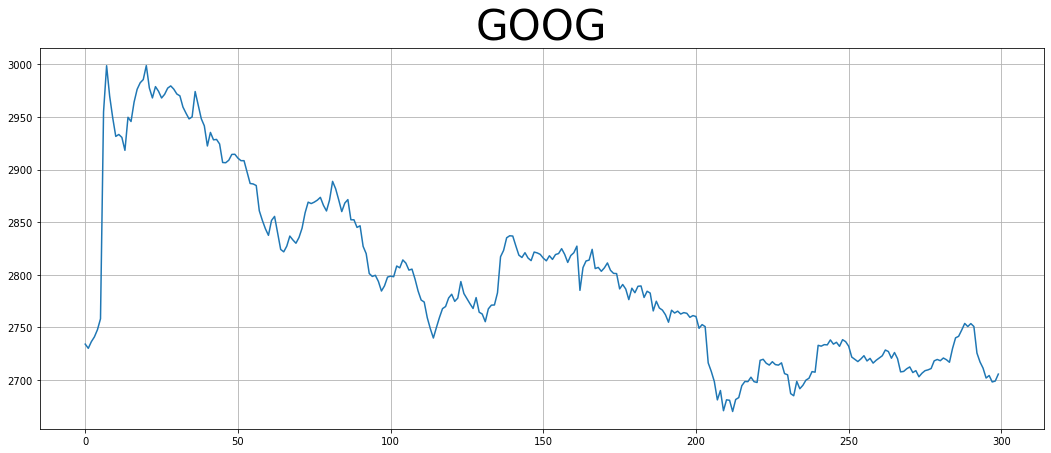

In [48]:
SEC_KEY = '7mi6lnaTynfrzxfDYyYUarBpUJ35sSgVEVIj6RZG'
PUB_KEY ='PKDL8E9SBYH9GYYXXZNL'
BASE_URL ='https://paper-api.alpaca.markets'
symb = "GOOG"
api = tradeapi.REST(key_id= PUB_KEY, secret_key=SEC_KEY, base_url=BASE_URL) # For real trading, don't enter a base_url
df = api.get_barset(symb, TimeFrame(15, TimeFrameUnit.Minute), limit=300).df  # Get one bar object for each of the past 5 minutes
df=df[symb]
df['Close']=df['close']
df['High']=df['high']
df['Low']=df['low']
df['Open']=df['open']
df['Volume']=df['volume']
plt.figure(figsize=(18,7))
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.plot(df['Close'] )
plt.title(symb,size=42)
plt.grid()
plt.show()

# RSI Indicator Visualizastion

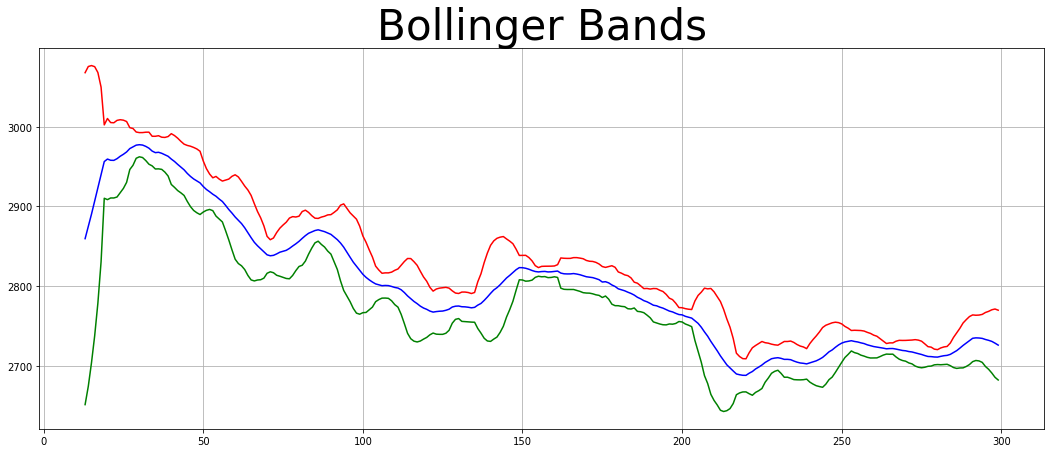

In [49]:
df['upperband'], df['middleband'], df['lowerband'] = ta.BBANDS(df['Close'], timeperiod=14, nbdevup=2, nbdevdn=2)

plt.figure(figsize=(18,7))

plt.plot(df['upperband'],color='r')
plt.plot(df['middleband'],color='b')
plt.plot(df['lowerband'],color='g')
plt.title('Bollinger Bands',size=42)
plt.grid()
plt.show()

# Empty Arrays

In [50]:
buy=[]
sell=[]
profit=[]
Close_profit=[]
Stop_loss=[]
Close_order_buy=[]
Close_order_sell=[]
position_Buy=None
position_Sell=None
profit=0.4
lose=0.4

# Decision Making Process


Profit = 15
Stop_loss = 16
PROFITIBLITY 48.38709677419355


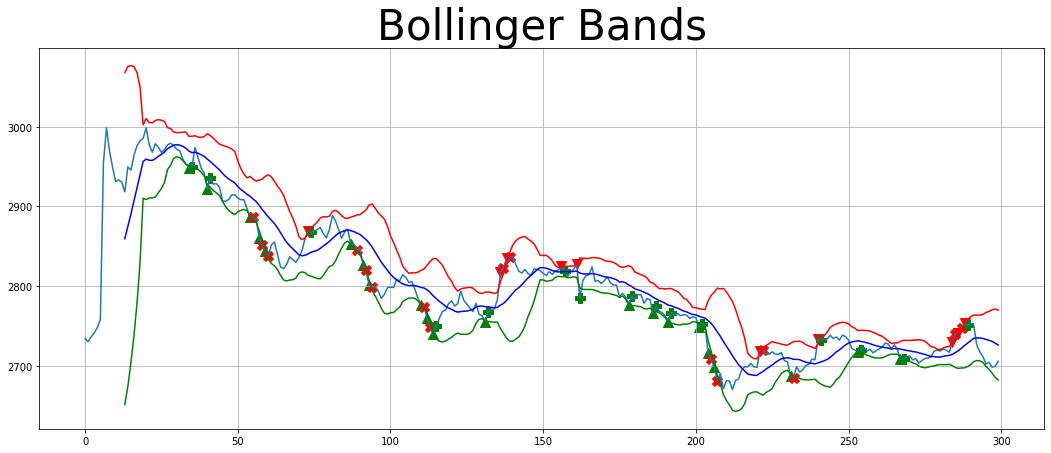

In [51]:
for i in range(len(df)):
   #####################################################################################################
    if df['Close'][i]<df['lowerband'][i]  and position_Buy!="Buy" and position_Sell!="Sell" :                          #Buy Position
                    buy.append(df['close'][i])
                    sell.append(np.nan)
                    Close_profit.append(np.nan)
                    Stop_loss.append(np.nan)
                    Close_order_buy.append(df['close'][i])
                    position_Buy="Buy"
    #############################################################################################
    elif  df['Close'][i]>df['upperband'][i] and position_Sell!="Sell" and position_Buy!="Buy"   :                     #Sell Position        
                sell.append(df['close'][i])              
                buy.append(np.nan)
                Close_profit.append(np.nan)
                Stop_loss.append(np.nan)
                Close_order_sell.append(df['close'][i])
                position_Sell="Sell"
        
    #################################################################################################
    elif position_Sell=="Sell" :                                               #Closing Order  After  Buying a trade(Profit)
        if ((Close_order_sell[-1]+lose) <= df['close'][i]):                   #Take Profit Condition
            Close_profit.append(np.nan)                                        #append to take profit
            Stop_loss.append(df['close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
        elif ((Close_order_sell[-1]-(profit)) >= df['close'][i]):                   #Stop Loss Condition
            Close_profit.append(df['close'][i])
            Stop_loss.append(np.nan)                                                #Appending to stop loss
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
        else:
            Close_profit.append(np.nan)
            Stop_loss.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
    ########################################################################################################
    elif position_Buy=="Buy" :                                               #Closing Order  After  Buying a trade(Profit)
        if ((Close_order_buy[-1]+profit) <= df['close'][i]):                  #Take Profit Condition
            Close_profit.append(df['close'][i])                          #append to take profit
            Stop_loss.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
           
        elif ((Close_order_buy[-1]-lose) >= df['close'][i]):                   #Stop Loss Condition
            Close_profit.append(np.nan)
            Stop_loss.append(df['close'][i])                                  #Appending to stop loss
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
     
        else:
            Close_profit.append(np.nan)
            Stop_loss.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
#################################################################
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Close_profit.append(np.nan)

           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss

df['Profit']=Close_profit
plt.figure(figsize=(18,7))


plt.scatter(df.index,df['buy'],marker='^',color='g',s=100)
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100)
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100)
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100)
plt.plot(df['Close'])
plt.plot(df['upperband'],color='r')
plt.plot(df['middleband'],color='b')
plt.plot(df['lowerband'],color='g')
plt.title('Bollinger Bands',size=42)

plt.grid()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")